# COVID-19 data analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the df1 dataset



In [2]:
df1 = pd.read_csv('Downloads/covid-19 dataset/covid_19_clean_complete.csv')


### cleaning and preprocess

In [3]:
df1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [4]:
df1.shape

(49068, 10)

In [5]:
# Display basic information about the dataset
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None


In [6]:
# Display the first few rows of the dataset
print(df1.head())


  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [7]:
# Handle Missing Values
df1.dropna(subset=['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'], inplace=True)



In [8]:
# Convert Date column to datetime
df1['Date'] = pd.to_datetime(df1['Date'])


In [9]:



# Save Cleaned Data
df1.to_csv('cleaned_covid_data.csv', index=False)


In [10]:
df1.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


In [11]:
df1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [12]:
confirmed=df1.groupby(['Date']).sum()['Confirmed'].reset_index() 
recovered=df1.groupby(['Date']).sum()['Recovered'].reset_index()
Deaths=df1.groupby(['Date']).sum()['Deaths'].reset_index()

In [13]:
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [14]:
recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [15]:
Deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


# EDA

## line plot -cov-19 cases over time analysis

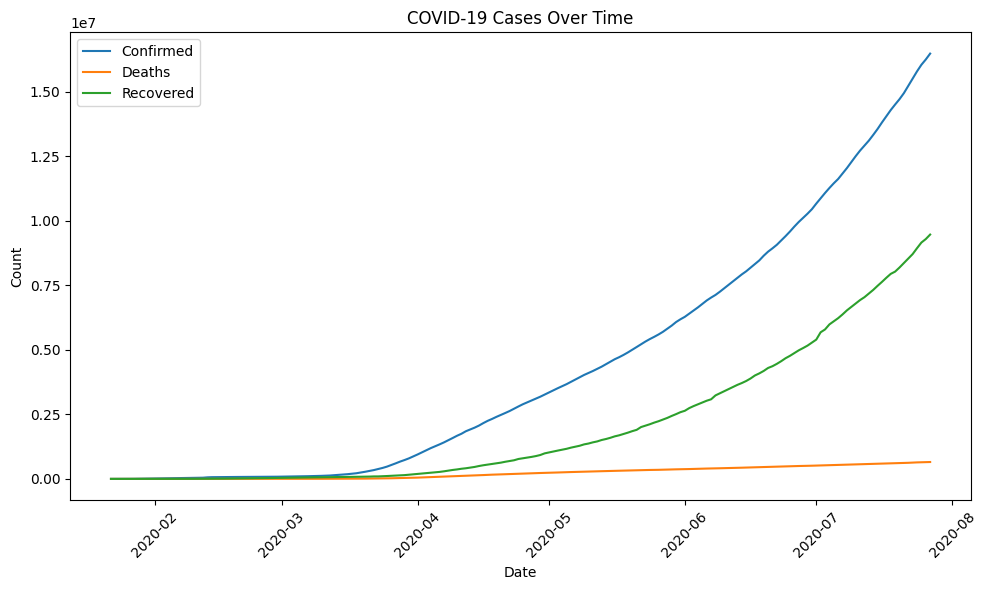

In [16]:
daily_status = df1.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

plt.figure(figsize=(10, 6))
plt.plot(daily_status.index, daily_status['Confirmed'], label='Confirmed')
plt.plot(daily_status.index, daily_status['Deaths'], label='Deaths')
plt.plot(daily_status.index, daily_status['Recovered'], label='Recovered')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Geographycal analysis

### HEAT MAP

In [17]:




# Pivot data for heatmap
country_status = df1.pivot_table(index='Country/Region', columns='Date', values='Confirmed', aggfunc='sum')


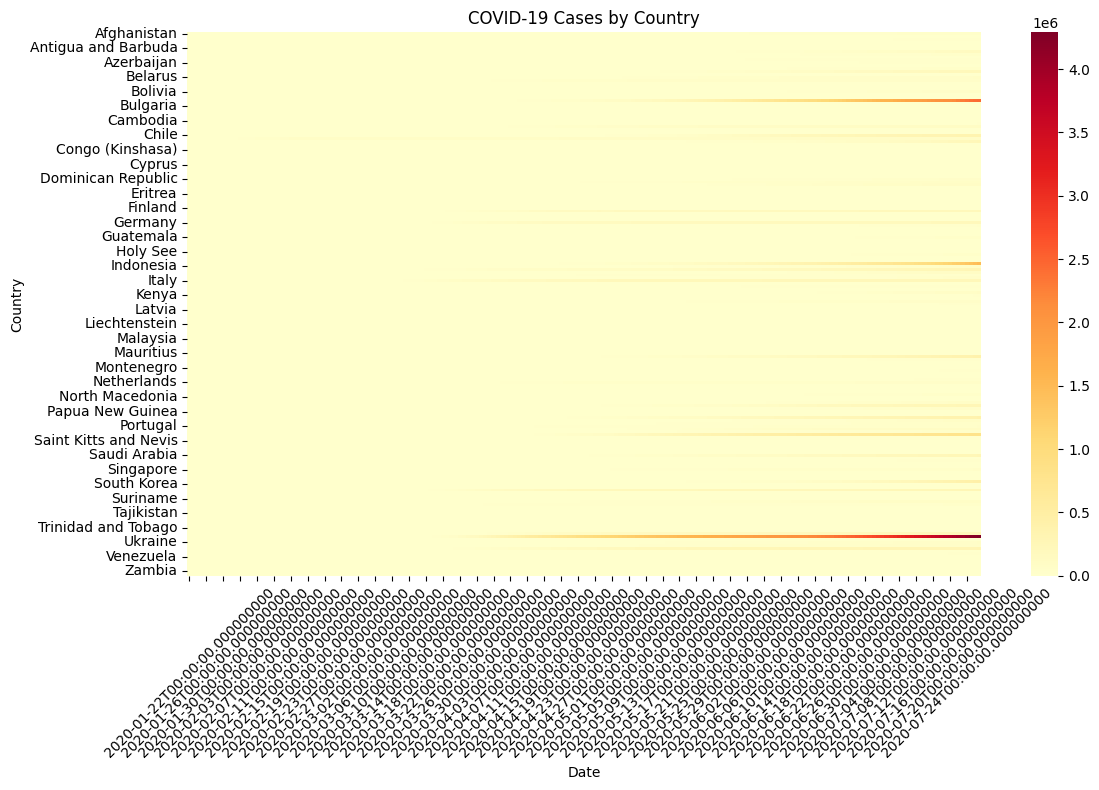

In [18]:

plt.figure(figsize=(12, 8))
sns.heatmap(country_status, cmap='YlOrRd')
plt.title('COVID-19 Cases by Country')
plt.xlabel('Date')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Plotting Total Confirmed Cases by Country/Region

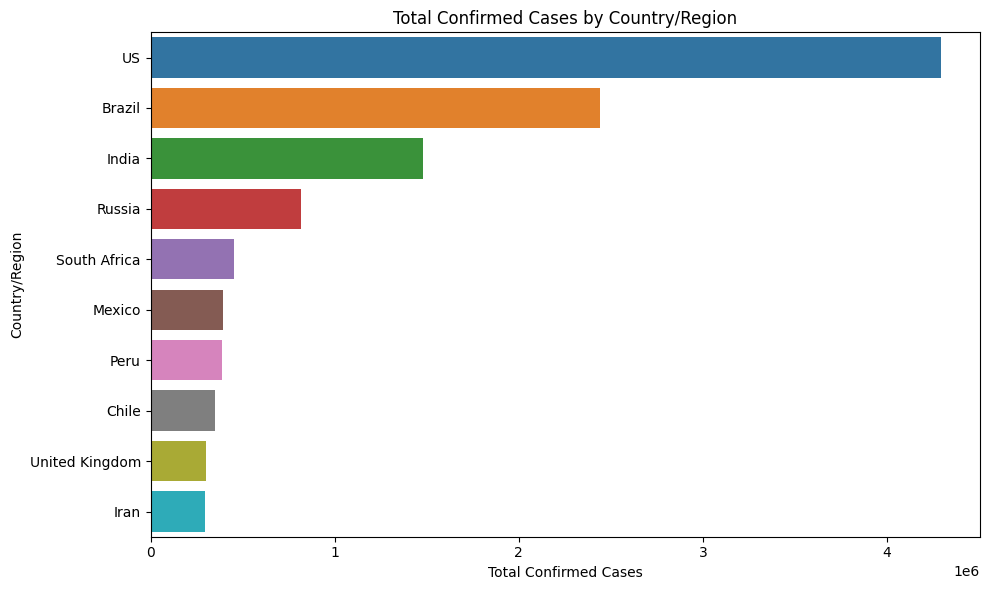

In [19]:


top_countries = df1.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Total Confirmed Cases by Country/Region')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country/Region')
plt.tight_layout()
plt.show()

# Load the df2 dataset

In [20]:



df2 = pd.read_csv('Downloads/covid-19 dataset/country_wise_latest.csv')





In [21]:
# Display basic information about the dataset
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [22]:
df2.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [23]:
df2.describe()


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [24]:
df2.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [25]:
df2.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


### Exploratory Data Analysis (EDA]

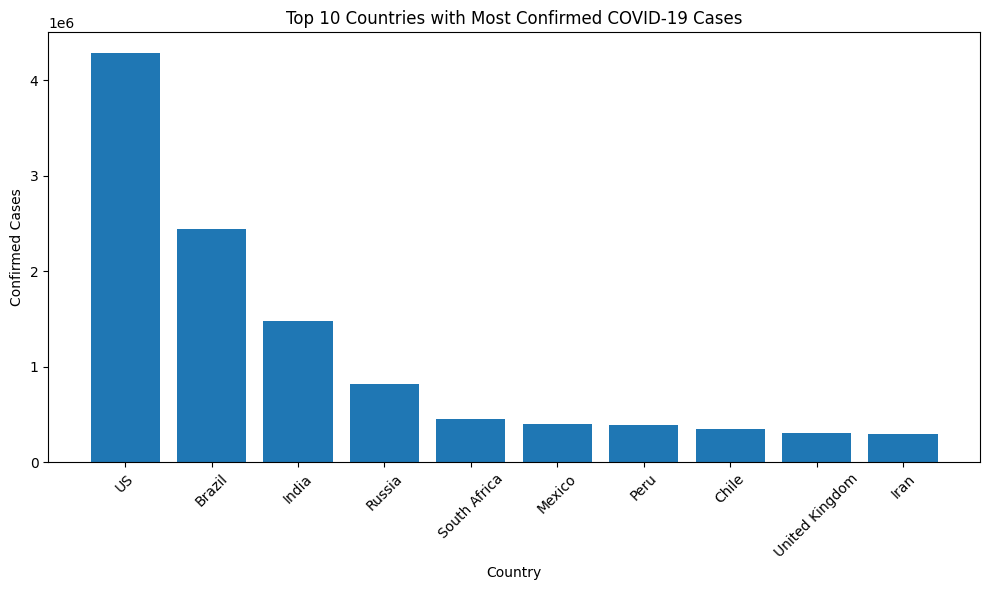

In [26]:

top_countries = df2.nlargest(10, 'Confirmed')

plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country/Region'], top_countries['Confirmed'])
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries with Most Confirmed COVID-19 Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Mortality Rate

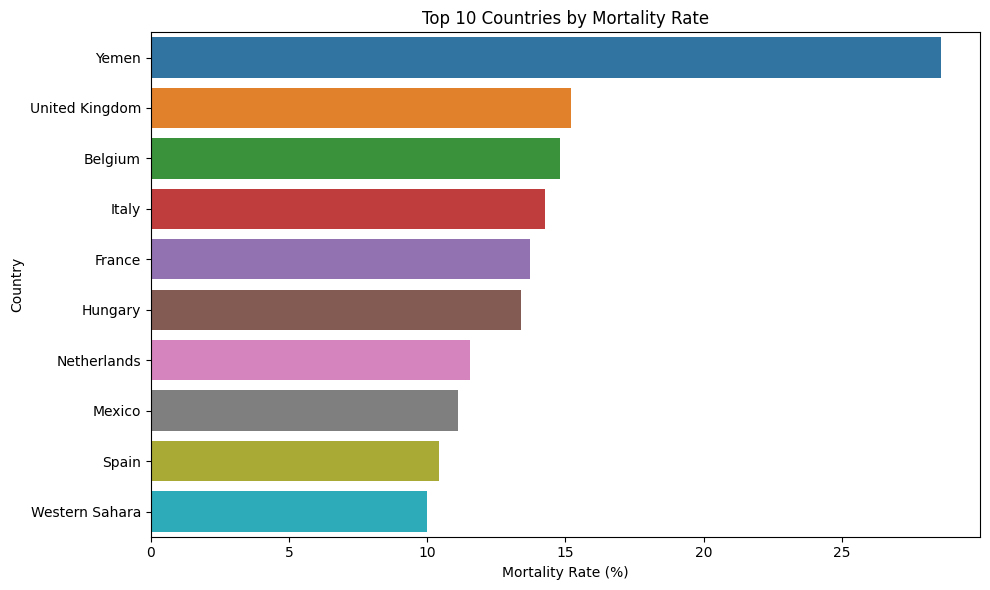

In [27]:



# Calculate Mortality Rate
df2['Mortality_Rate'] = (df2['Deaths'] / df2['Confirmed']) * 100





# Plotting Mortality Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Mortality_Rate', y='Country/Region', data=df2.sort_values('Mortality_Rate', ascending=False).head(10))
plt.title('Top 10 Countries by Mortality Rate')
plt.xlabel('Mortality Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


#### Recovery Rate

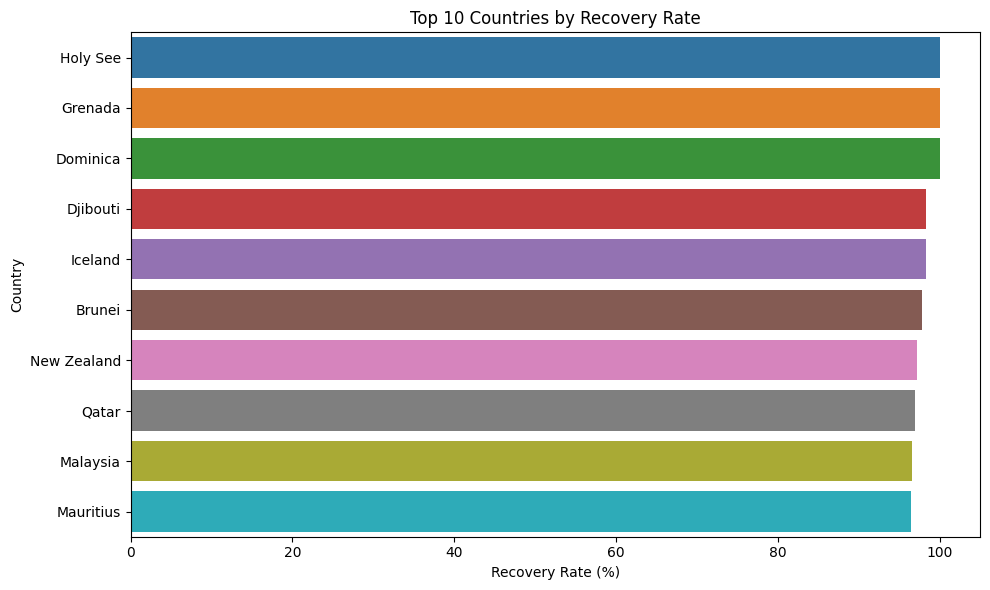

In [28]:



df2['Recovery_Rate'] = (df2['Recovered'] / df2['Confirmed']) * 100


# Exploratory Data Analysis (EDA)

# Plotting Recovery Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Recovery_Rate', y='Country/Region', data=df2.sort_values('Recovery_Rate', ascending=False).head(10))
plt.title('Top 10 Countries by Recovery Rate')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


##### Box plot of Mortality Rate by Continent

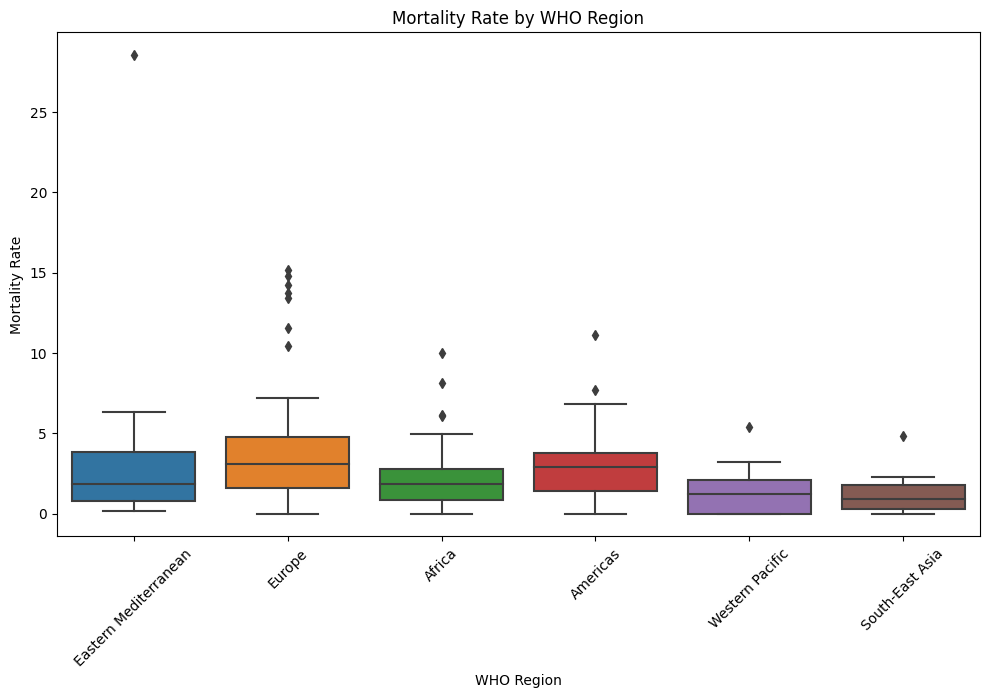

In [29]:




plt.figure(figsize=(10, 6))
sns.boxplot(x='WHO Region', y='Mortality_Rate', data=df2)
plt.title('Mortality Rate by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Mortality Rate')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


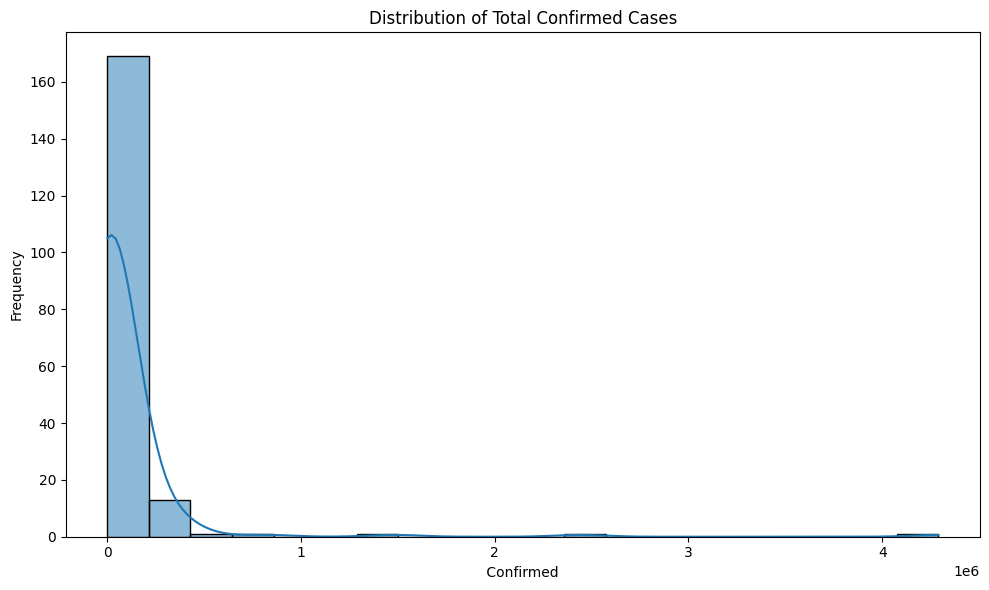

In [30]:
# Histogram of Total Confirmed Cases
plt.figure(figsize=(10, 6))
sns.histplot(df2['Confirmed'], bins=20, kde=True)
plt.title('Distribution of Total Confirmed Cases')
plt.xlabel(' Confirmed ')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



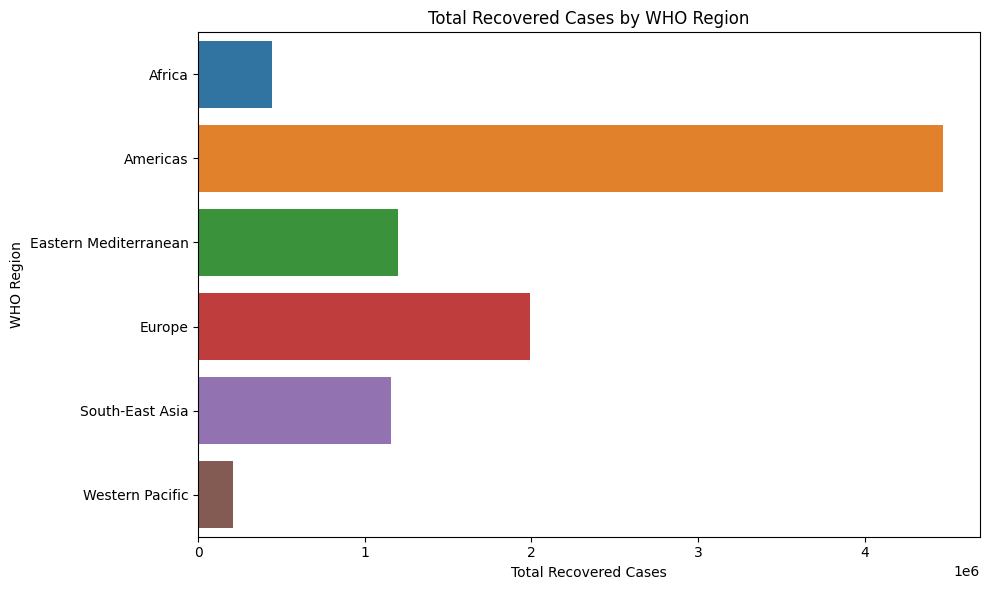

In [31]:
# Plotting Total Recovered Cases by Continent
plt.figure(figsize=(10, 6))
sns.barplot(x='Recovered', y='WHO Region', data=df2.groupby('WHO Region').sum().reset_index())
plt.title('Total Recovered Cases by WHO Region')
plt.xlabel('Total Recovered Cases')
plt.ylabel('WHO Region')
plt.tight_layout()
plt.show()

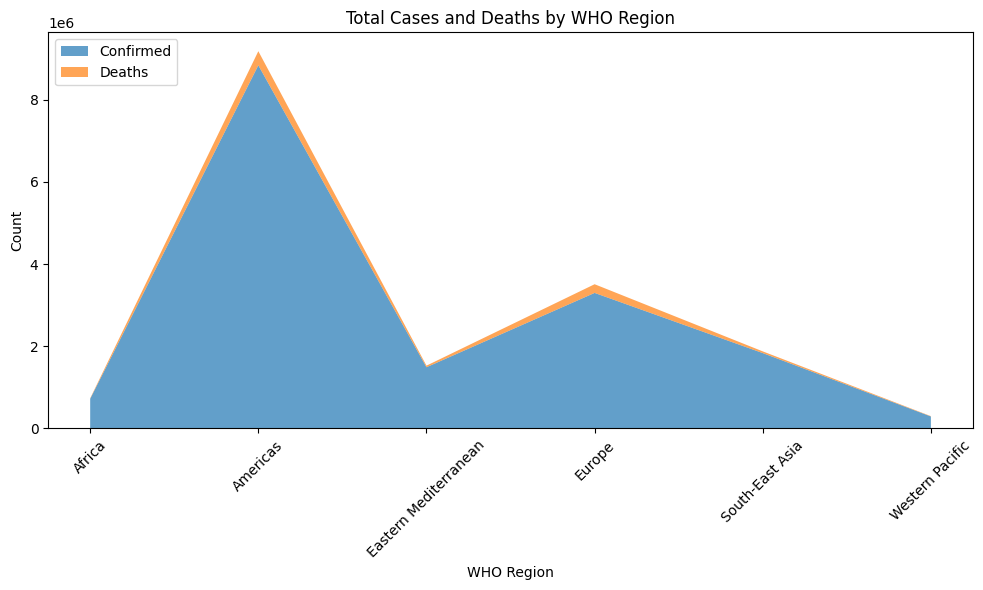

In [32]:


# Group data by WHO Region and sum the Confirmed and Deaths cases
region_cases = df2.groupby('WHO Region')[['Confirmed', 'Deaths']].sum().reset_index()

# Create a stacked area plot
plt.figure(figsize=(10, 6))
plt.stackplot(region_cases['WHO Region'], region_cases['Confirmed'], region_cases['Deaths'], labels=['Confirmed', 'Deaths'], alpha=0.7)
plt.title('Total Cases and Deaths by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


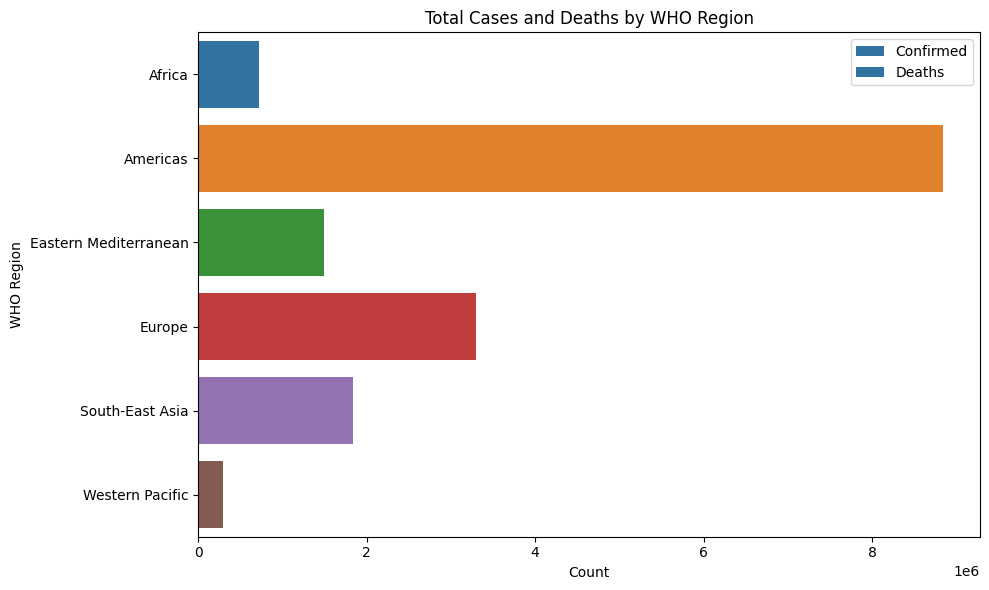

In [33]:
# Plotting Cases and Deaths by WHO Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='WHO Region', data=df2.groupby('WHO Region').sum().reset_index(), label='Confirmed')
sns.barplot(x='Deaths', y='WHO Region', data=df2.groupby('WHO Region').sum().reset_index(), label='Deaths')
plt.title('Total Cases and Deaths by WHO Region')
plt.xlabel('Count')
plt.ylabel('WHO Region')
plt.tight_layout()
plt.legend()
plt.show()


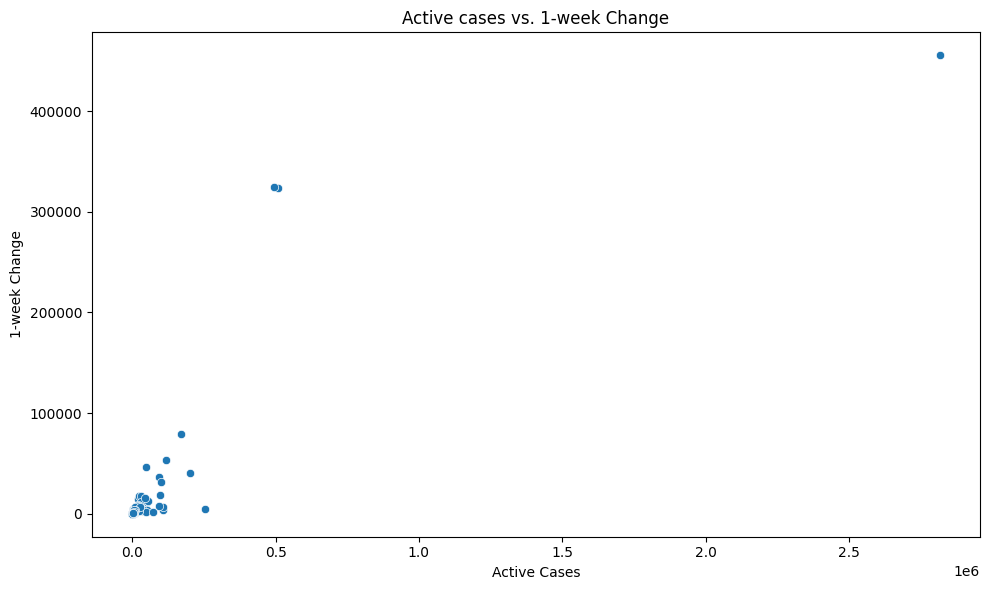

In [34]:
# Scatter plot of Active Cases vs. 1-week Change
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Active', y='1 week change', data=df2)
plt.title('Active cases vs. 1-week Change')
plt.xlabel('Active Cases')
plt.ylabel('1-week Change')
plt.tight_layout()
plt.show()

In [39]:
df2.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region', 'Mortality_Rate', 'Recovery_Rate'],
      dtype='object')

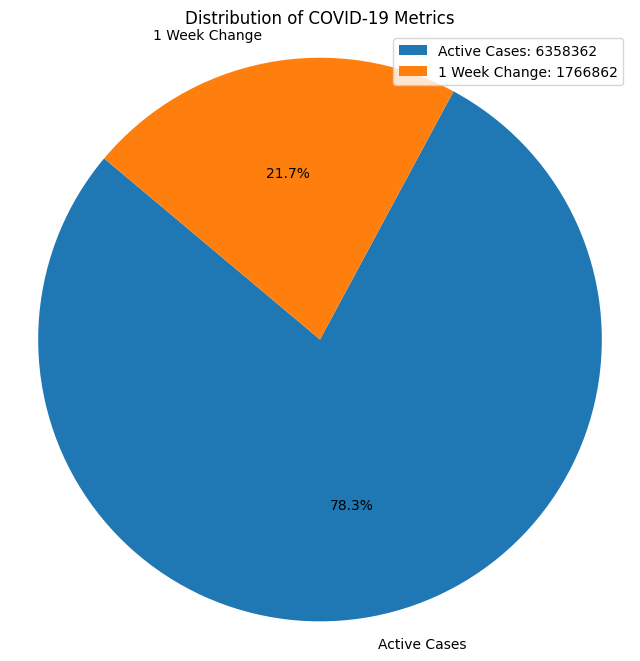

In [93]:


# Combine the metrics and labels
combined_metrics =[ total_active, total_change]
metric_labels = ['Active Cases', '1 Week Change']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(combined_metrics, labels=metric_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of COVID-19 Metrics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(loc='best', labels=[f'{label}: {value}' for label, value in zip(metric_labels, combined_metrics)])

plt.show()


# Load the d3 dataset

In [44]:


df3 = pd.read_csv('Downloads/covid-19 dataset/full_grouped.csv')


In [45]:
df3

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [46]:
df3.shape

(35156, 10)

In [47]:
# Display basic statistics
summary = df3.describe()
print("Basic Statistics:")
print(summary)


Basic Statistics:
          Confirmed         Deaths     Recovered        Active    New cases  \
count  3.515600e+04   35156.000000  3.515600e+04  3.515600e+04  35156.00000   
mean   2.356663e+04    1234.068239  1.104813e+04  1.128443e+04    469.36375   
std    1.499818e+05    7437.238354  6.454640e+04  8.997149e+04   3005.86754   
min    0.000000e+00       0.000000  0.000000e+00 -2.000000e+00      0.00000   
25%    1.000000e+00       0.000000  0.000000e+00  0.000000e+00      0.00000   
50%    2.500000e+02       4.000000  3.300000e+01  8.500000e+01      2.00000   
75%    3.640250e+03      78.250000  1.286250e+03  1.454000e+03     75.00000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  77255.00000   

         New deaths  New recovered  
count  35156.000000   35156.000000  
mean      18.603339     269.315593  
std      115.706351    2068.063852  
min    -1918.000000  -16298.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        

In [48]:
df3.dropna(inplace=True) 

In [49]:
df3.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [50]:
df3.info

<bound method DataFrame.info of              Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0      2020-01-22         Afghanistan          0       0          0       0   
1      2020-01-22             Albania          0       0          0       0   
2      2020-01-22             Algeria          0       0          0       0   
3      2020-01-22             Andorra          0       0          0       0   
4      2020-01-22              Angola          0       0          0       0   
...           ...                 ...        ...     ...        ...     ...   
35151  2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1691     483        833     375   
35154  2020-07-27              Zambia       4552     140       2815    1597   
35155  2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  N

In [51]:

df3['Date'] = pd.to_datetime(df3['Date'])



### Exploratory Data Analysis (EDA)

### Plotting Total Confirmed, Deaths, and Recovered Cases over time

<function matplotlib.pyplot.show(close=None, block=None)>

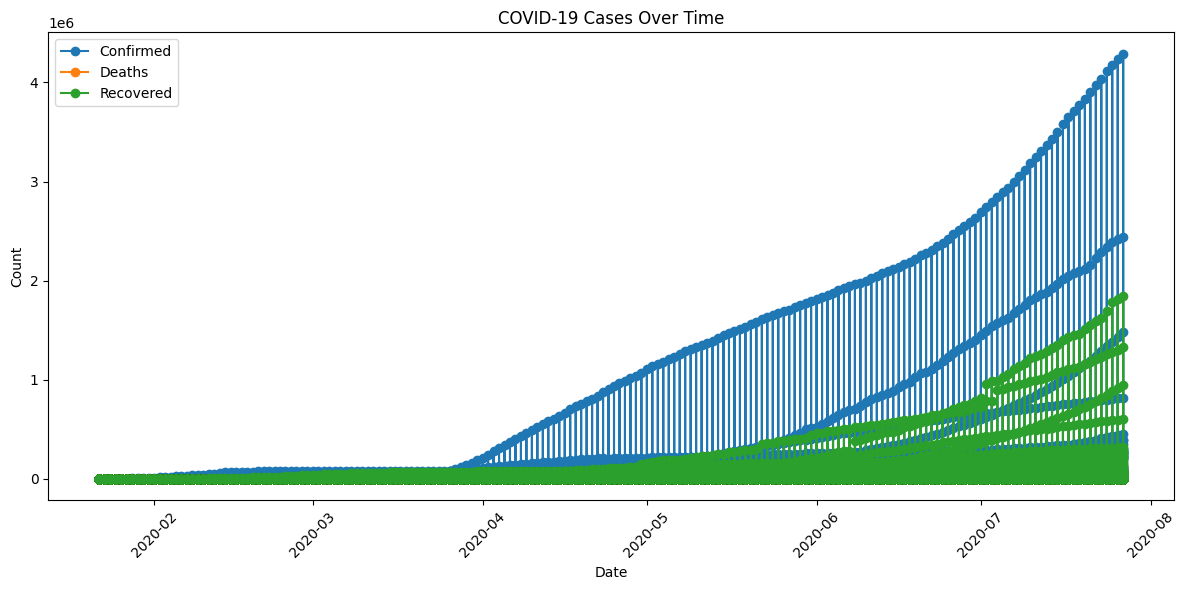

In [52]:


plt.figure(figsize=(12, 6))
plt.plot(df3['Date'], df3['Confirmed'], label='Confirmed', marker='o')
plt.plot(df3['Date'], df3['Deaths'], label='Deaths', marker='o')
plt.plot(df3['Date'], df3['Recovered'], label='Recovered', marker='o')
plt.title('COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

### Plotting Active Cases, New Cases, and New Deaths over time

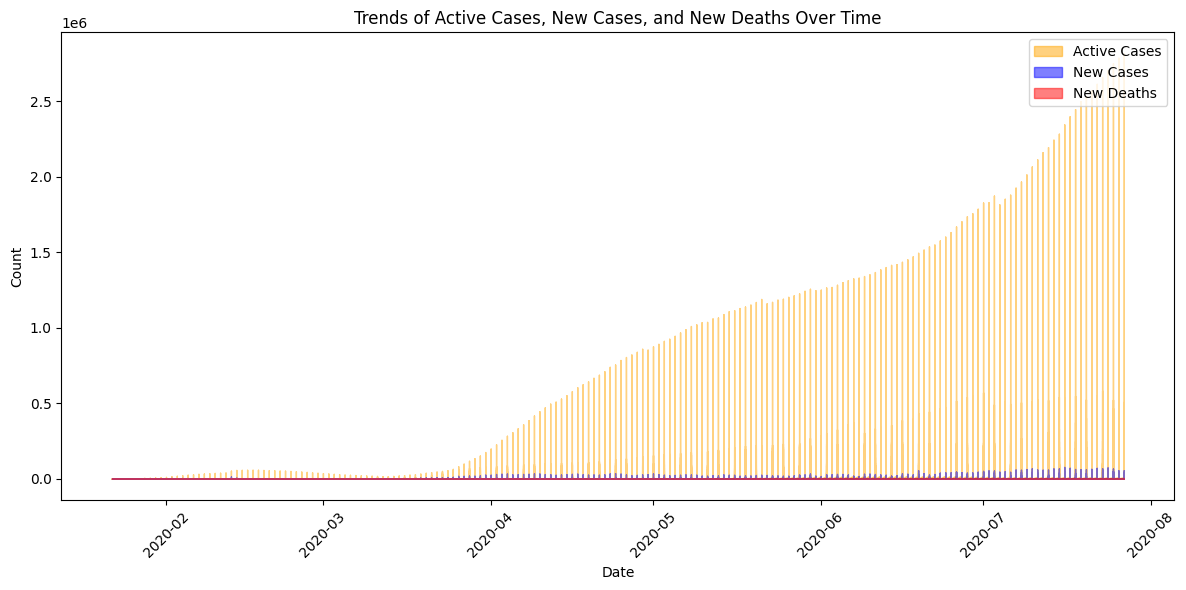

In [53]:

plt.figure(figsize=(12, 6))
plt.fill_between(df3['Date'], df3['Active'], label='Active Cases', color='orange', alpha=0.5)
plt.fill_between(df3['Date'], df3['New cases'], label='New Cases', color='blue', alpha=0.5)
plt.fill_between(df3['Date'], df3['New deaths'], label='New Deaths', color='red', alpha=0.5)
plt.title('Trends of Active Cases, New Cases, and New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






# load the d4 data set



In [57]:
df4 = pd.read_csv('Downloads/covid-19 dataset/day_wise.csv')

In [59]:
df4

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [60]:
df4.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [61]:



# Convert the Date column to datetime format
df4['Date'] = pd.to_datetime(df4['Date'])



In [63]:
df4.describe()


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,188,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,2020-04-24 12:00:00,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
min,2020-01-22 00:00:00,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,2020-03-08 18:00:00,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2020-04-24 12:00:00,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,2020-06-10 06:00:00,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,2020-07-27 00:00:00,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000
std,NaN,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979


### Select a specific date (e.g., April 15, 2020) for analysis

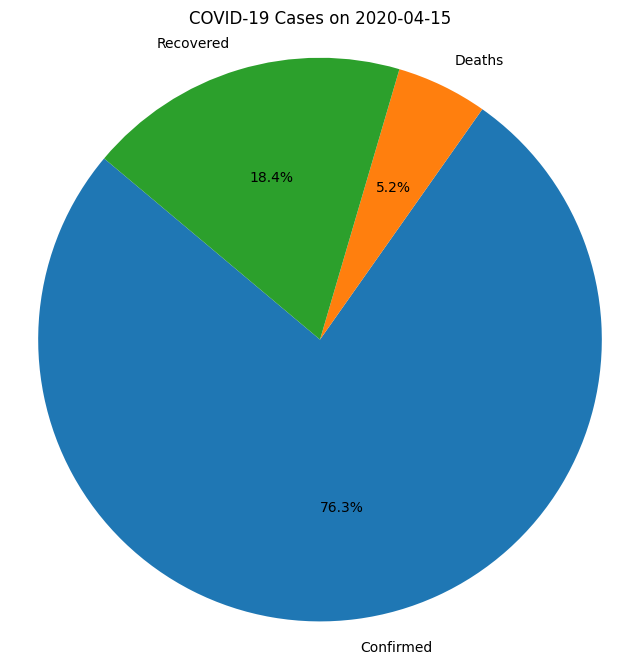

In [64]:


selected_date = '2020-04-15'
selected_day = df4[df4['Date'] == selected_date]

# Data for the pie chart
case_types = ['Confirmed', 'Deaths', 'Recovered']
case_counts = [selected_day['Confirmed'].values[0], selected_day['Deaths'].values[0], selected_day['Recovered'].values[0]]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(case_counts, labels=case_types, autopct='%1.1f%%', startangle=140)
plt.title(f'COVID-19 Cases on {selected_date}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### 'Deaths / 100 Cases, Recovered / 100 Cases, and Deaths / 100 Recovered on {selected_date}')

<Figure size 1200x600 with 0 Axes>

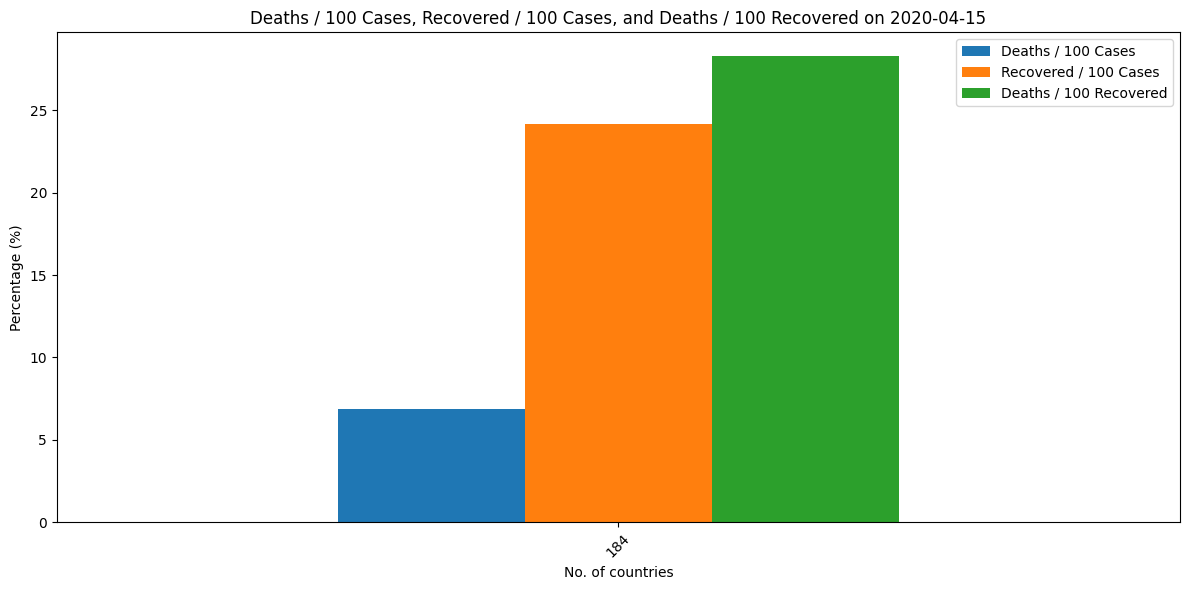

In [65]:


# Select a specific date (e.g., April 15, 2020) for analysis
selected_date = '2020-04-15'
selected_day = df4[df4['Date'] == selected_date]

# Prepare data for plotting
data = selected_day[['No. of countries', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered']]

# Plotting the distribution
plt.figure(figsize=(12, 6))
data.plot(kind='bar', x='No. of countries', figsize=(12, 6))
plt.title(f'Deaths / 100 Cases, Recovered / 100 Cases, and Deaths / 100 Recovered on {selected_date}')
plt.xlabel('No. of countries')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Load the df5 dataset

In [68]:

df5 = pd.read_csv('Downloads/covid-19 dataset/usa_county_wise.csv')


In [69]:
print(df5.info())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB
None


In [70]:
df5['Date'] = pd.to_datetime(df5['Date'])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19872\2646987596.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df5['Date'] = pd.to_datetime(df5['Date'])


In [72]:
df5.describe()


,UID,code3,FIPS,Lat,Long_,Date,Confirmed,Deaths
count,6.279200e+05,627920.000000,626040.000000,627920.000000,627920.000000,627920,627920.000000,627920.000000
mean,8.342958e+07,834.491617,33061.684685,36.707212,-88.601474,2020-04-24 12:00:00,357.284285,17.536328
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,2020-01-22 00:00:00,0.000000,0.000000
25%,8.401811e+07,840.000000,19079.000000,33.895587,-97.790204,2020-03-08 18:00:00,0.000000,0.000000
50%,8.402921e+07,840.000000,31014.000000,38.002344,-89.486710,2020-04-24 12:00:00,4.000000,0.000000
75%,8.404612e+07,840.000000,47131.000000,41.573069,-82.311265,2020-06-10 06:00:00,63.000000,1.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,2020-07-27 00:00:00,224051.000000,23500.000000
std,4.314702e+06,36.492620,18636.156825,9.061572,21.715747,NaN,3487.282694,300.991466


In [73]:
df5.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Date', 'Confirmed',
       'Deaths'],
      dtype='object')

###  Plotting Total Confirmed and Deaths Cases over time for USA counties

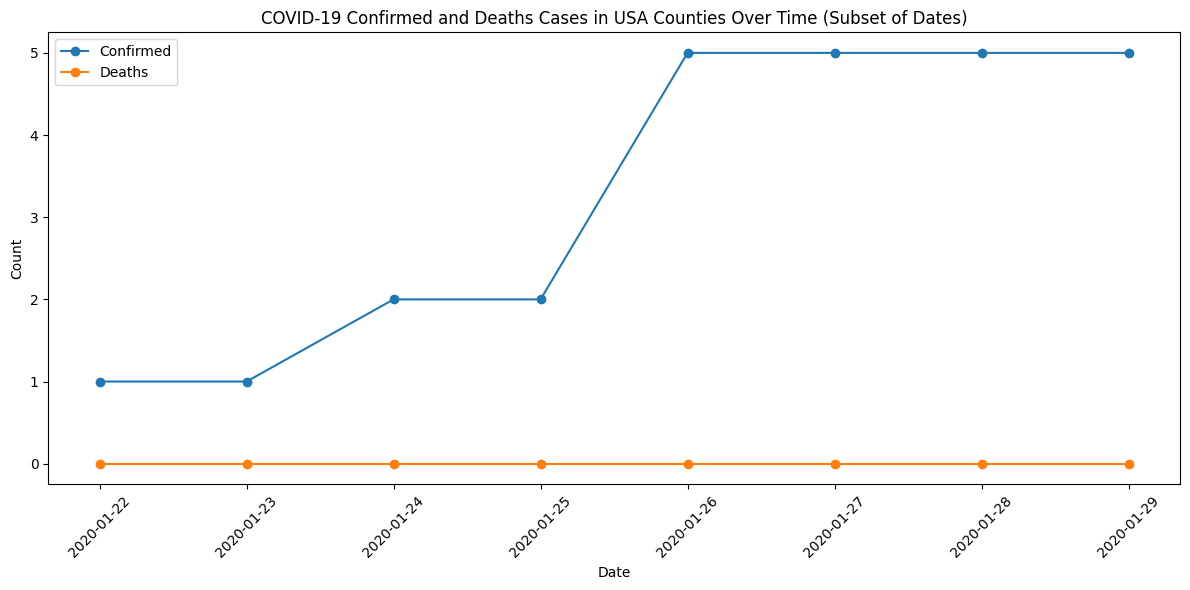

In [75]:




# Filter the data for a subset of dates (e.g., the first 8 dates)
subset_dates = df5['Date'].unique()[:8]
subset_data = df5[df5['Date'].isin(subset_dates)]

# Group data by Date and sum the cases
daily_cases = subset_data.groupby('Date')[['Confirmed', 'Deaths']].sum()

# Plotting Total Confirmed and Deaths Cases over time for USA counties
plt.figure(figsize=(12, 6))
plt.plot(daily_cases.index, daily_cases['Confirmed'], label='Confirmed', marker='o')
plt.plot(daily_cases.index, daily_cases['Deaths'], label='Deaths', marker='o')
plt.title('COVID-19 Confirmed and Deaths Cases in USA Counties Over Time (Subset of Dates)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


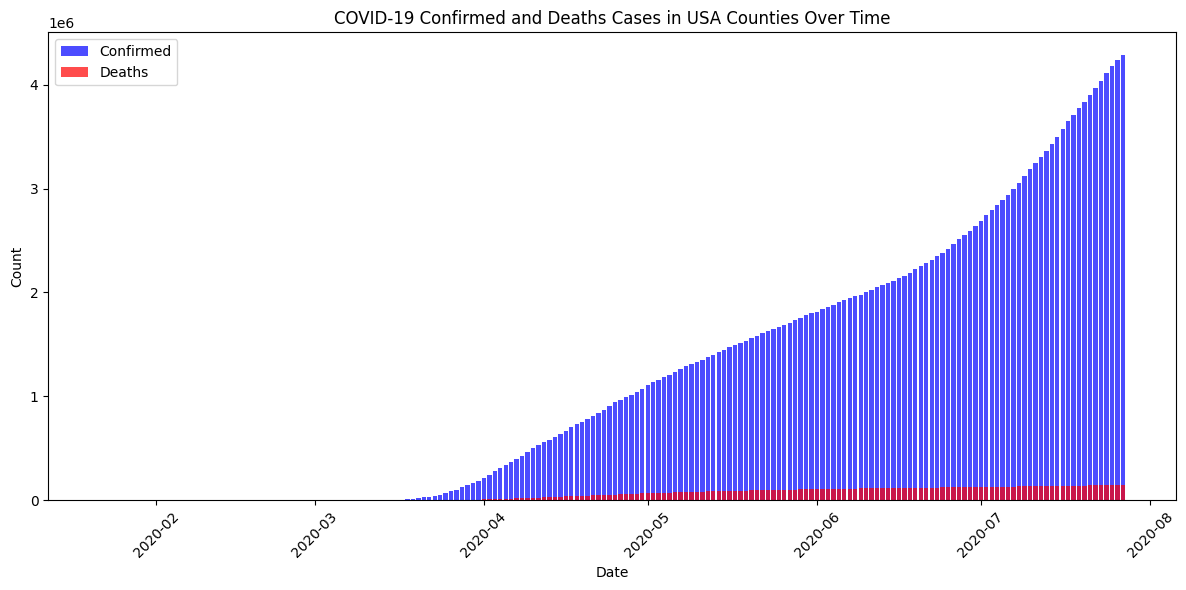

In [74]:



# Group data by Date and sum the cases
daily_cases = df5.groupby('Date')[['Confirmed', 'Deaths']].sum()

# Plotting Total Confirmed and Deaths Cases over time for USA counties
plt.figure(figsize=(12, 6))
plt.bar(daily_cases.index, daily_cases['Confirmed'], label='Confirmed', color='blue', alpha=0.7)
plt.bar(daily_cases.index, daily_cases['Deaths'], label='Deaths', color='red', alpha=0.7)
plt.title('COVID-19 Confirmed and Deaths Cases in USA Counties Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Plotting Total Confirmed Cases by State in a pie chart

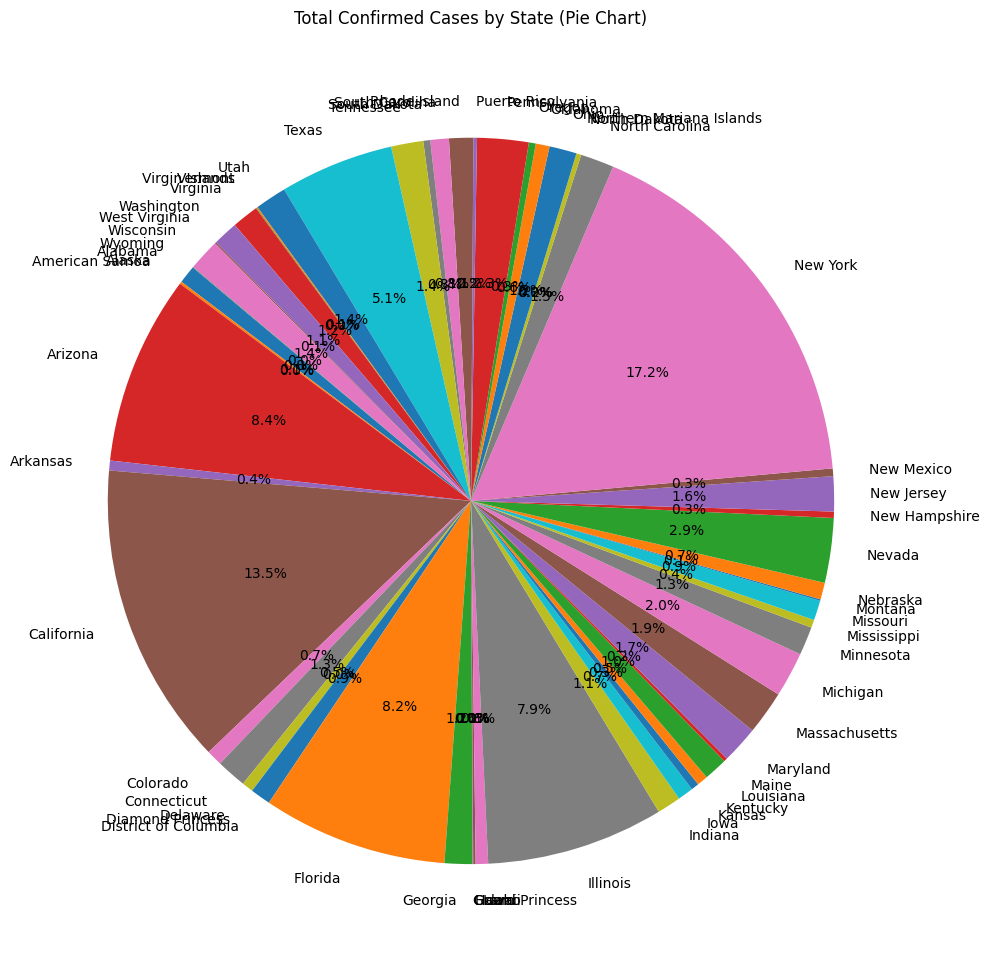

In [76]:



plt.figure(figsize=(10, 10))
state_confirmed = df5.groupby('Province_State')['Confirmed'].max()
plt.pie(state_confirmed, labels=state_confirmed.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Confirmed Cases by State (Pie Chart)')
plt.axis('equal')  
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

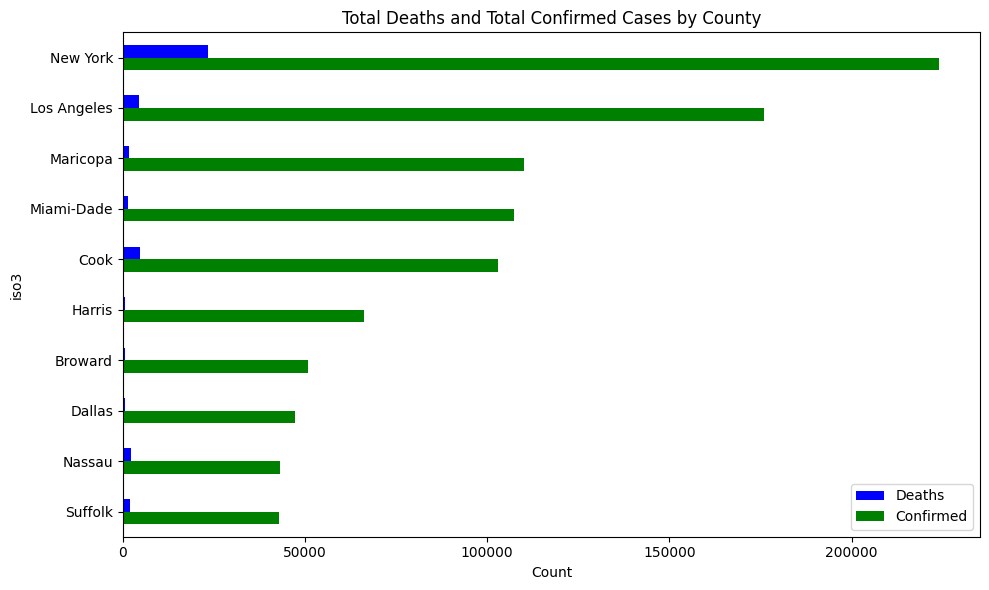

In [77]:


# Grouping data by Admin2 (Country using iso3  ) and selecting the maximum Deaths and Confirmed values
top_counties = df5.groupby('Admin2')[['Deaths', 'Confirmed']].max().sort_values(by='Confirmed', ascending=False).head(10)

# Define custom colors for bars
colors = ['blue', 'green']

# Plotting Total Deaths and Total Confirmed Cases by County using a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = top_counties.plot(kind='barh', figsize=(10, 6), color=colors)
plt.title('Total Deaths and Total Confirmed Cases by County')
plt.xlabel('Count')
plt.ylabel('iso3')
plt.tight_layout()

# Invert y-axis to display the highest count on top
ax.invert_yaxis()

plt.show()






# Load the dataset

In [79]:
df6 = pd.read_csv('Downloads/covid-19 dataset/worldometer_data.csv')

In [80]:
df6.info

<bound method DataFrame.info of             Country/Region      Continent    Population  TotalCases  NewCases  \
0                      USA  North America  3.311981e+08     5032179       NaN   
1                   Brazil  South America  2.127107e+08     2917562       NaN   
2                    India           Asia  1.381345e+09     2025409       NaN   
3                   Russia         Europe  1.459409e+08      871894       NaN   
4             South Africa         Africa  5.938157e+07      538184       NaN   
..                     ...            ...           ...         ...       ...   
204             Montserrat  North America  4.992000e+03          13       NaN   
205  Caribbean Netherlands  North America  2.624700e+04          13       NaN   
206       Falkland Islands  South America  3.489000e+03          13       NaN   
207           Vatican City         Europe  8.010000e+02          12       NaN   
208         Western Sahara         Africa  5.986820e+05          10       NaN

In [81]:
df6.shape

(209, 16)

In [83]:
df6.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [84]:
df6.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa




### Exploratory Data Analysis (EDA)

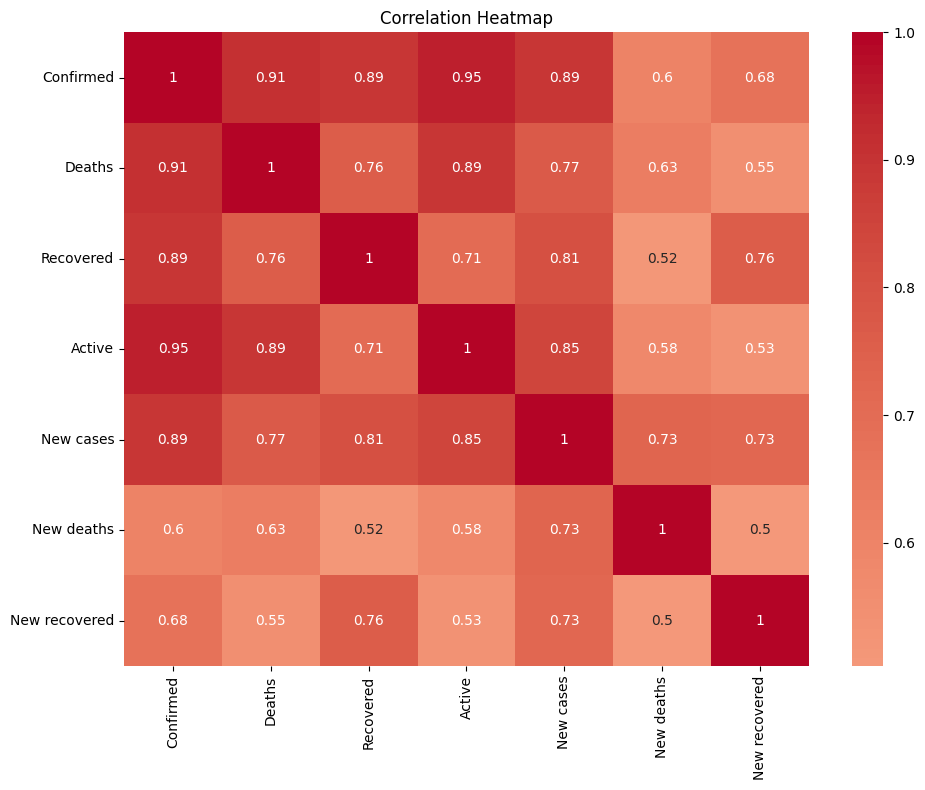

In [85]:

# Select only numeric columns for correlation matrix
numeric_columns = df3.select_dtypes(include=[float, int])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()



 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()




###  Plotting Total Deaths and Total Confirmed Cases by Continent

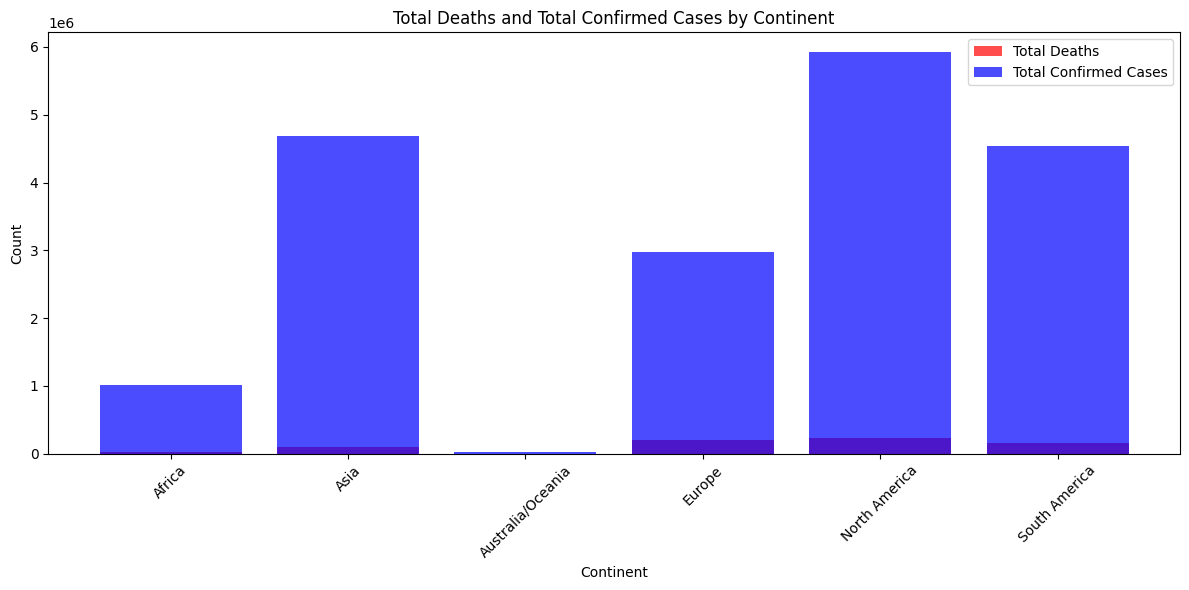

In [86]:

# Group data by Continent and sum the Total Deaths and Total Confirmed Cases
continent_data = df6.groupby('Continent')[['TotalDeaths', 'TotalCases']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(continent_data['Continent'], continent_data['TotalDeaths'], label='Total Deaths', color='red', alpha=0.7)
plt.bar(continent_data['Continent'], continent_data['TotalCases'], label='Total Confirmed Cases', color='blue', alpha=0.7)
plt.title('Total Deaths and Total Confirmed Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


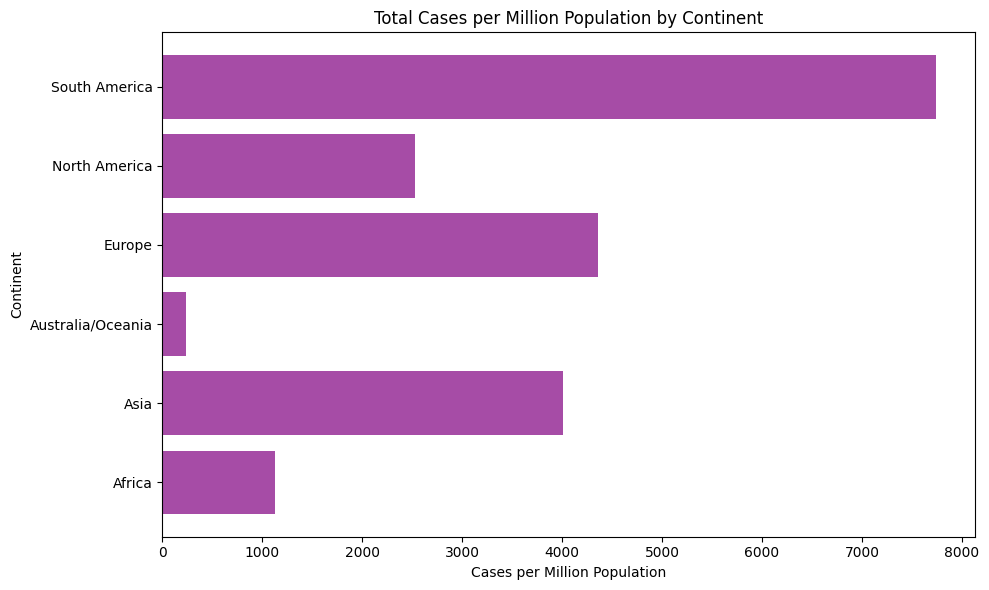

In [87]:
plt.figure(figsize=(10, 6))
plt.barh(continent_data['Continent'], df6.groupby('Continent')['Tot Cases/1M pop'].mean(), color='purple', alpha=0.7)
plt.title('Total Cases per Million Population by Continent')
plt.ylabel('Continent')
plt.xlabel('Cases per Million Population')
plt.tight_layout()
plt.show()


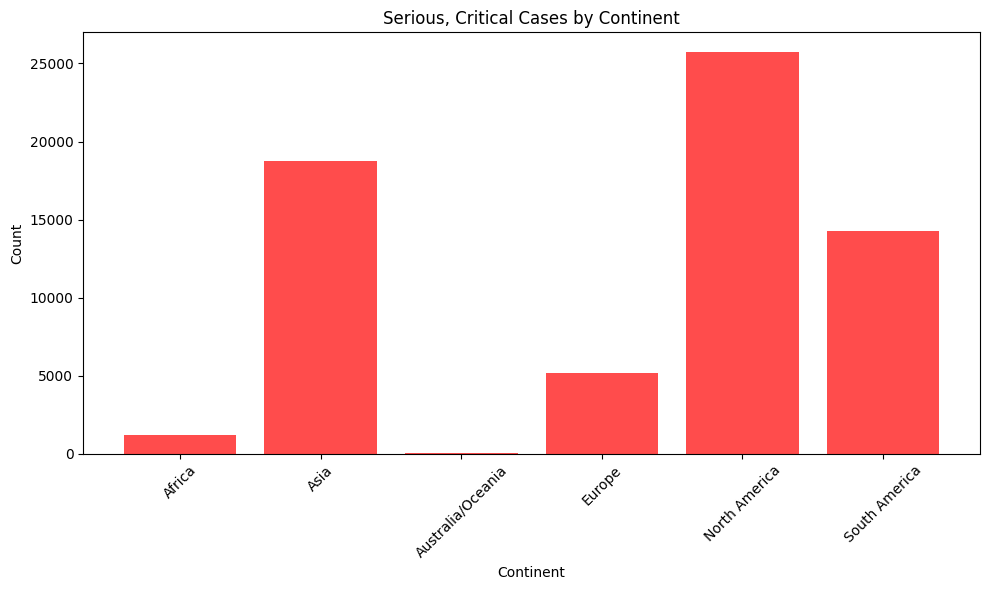

In [88]:
plt.figure(figsize=(10, 6))
plt.bar(continent_data['Continent'], df6.groupby('Continent')['Serious,Critical'].sum(), color='red', alpha=0.7)
plt.title('Serious, Critical Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


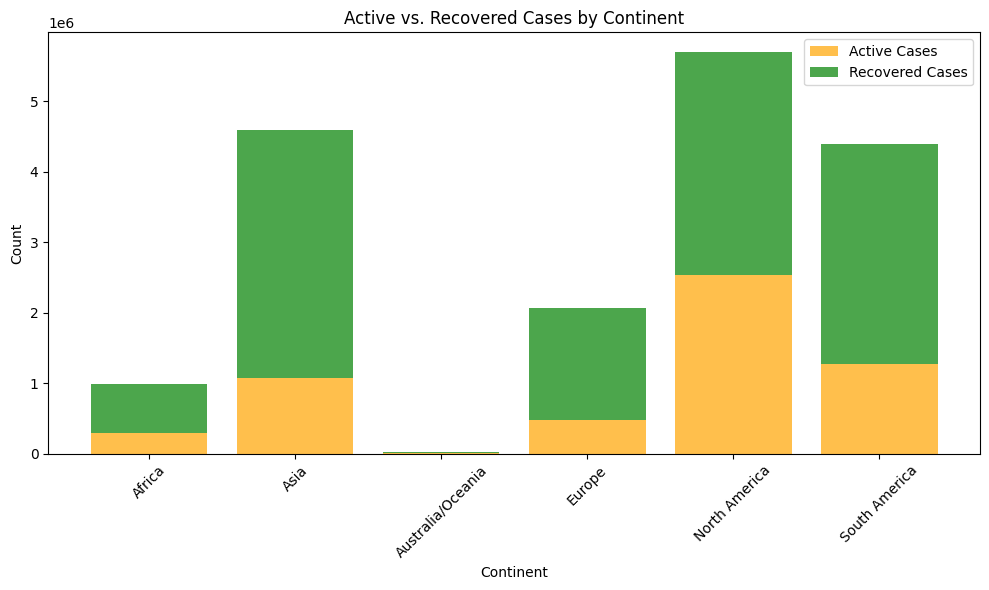

In [89]:
plt.figure(figsize=(10, 6))
plt.bar(continent_data['Continent'], df6.groupby('Continent')['ActiveCases'].sum(), color='orange', alpha=0.7, label='Active Cases')
plt.bar(continent_data['Continent'], df6.groupby('Continent')['TotalRecovered'].sum(), bottom=df6.groupby('Continent')['ActiveCases'].sum(), color='green', alpha=0.7, label='Recovered Cases')
plt.title('Active vs. Recovered Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



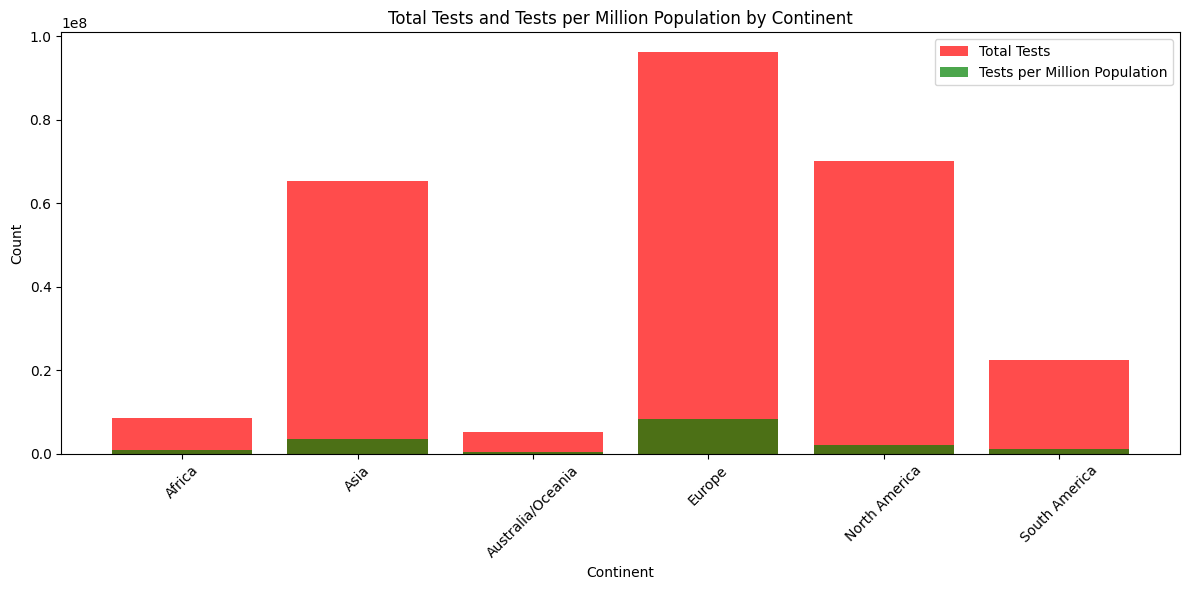

In [90]:

# Group data by Continent and sum the Total Tests and Tests per Million Population
tests_data = df6.groupby('Continent')[['TotalTests', 'Tests/1M pop']].sum().reset_index()

# Plotting Total Tests and Tests per Million Population by Continent
plt.figure(figsize=(12, 6))
plt.bar(tests_data['Continent'], tests_data['TotalTests'], label='Total Tests', color='red', alpha=0.7)
plt.bar(tests_data['Continent'], tests_data['Tests/1M pop'], label='Tests per Million Population', color='green', alpha=0.7)
plt.title('Total Tests and Tests per Million Population by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


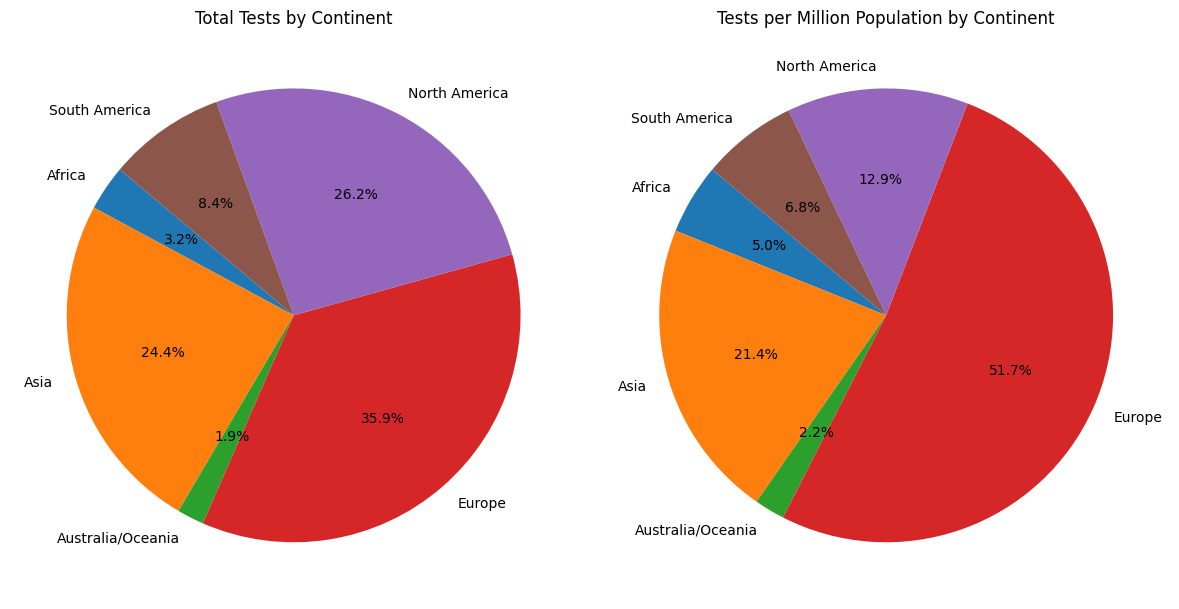

In [91]:

# Group data by Continent and sum the Total Tests and Tests per Million Population
tests_data = df6.groupby('Continent')[['TotalTests', 'Tests/1M pop']].sum().reset_index()

# Plotting Total Tests by Continent in a pie chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(tests_data['TotalTests'], labels=tests_data['Continent'], autopct='%1.1f%%', startangle=140)
plt.title('Total Tests by Continent')

# Plotting Tests per Million Population by Continent in a pie chart
plt.subplot(1, 2, 2)
plt.pie(tests_data['Tests/1M pop'], labels=tests_data['Continent'], autopct='%1.1f%%', startangle=140)
plt.title('Tests per Million Population by Continent')

plt.tight_layout()
plt.show()


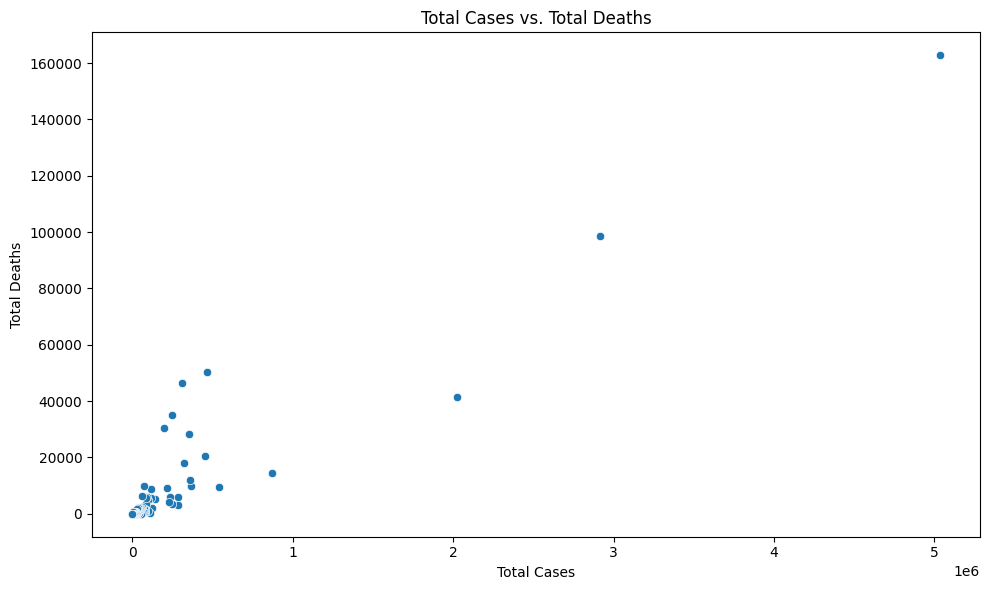

In [92]:

# Plotting Total Cases vs. Total Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCases', y='TotalDeaths', data=df6)
plt.title('Total Cases vs. Total Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()
